# Data Download

In [1]:
from data_querier import DataQuerierYF
from config import load_config


configuration = load_config()
data_getter = DataQuerierYF(configuration)

[*********************100%***********************]  505 of 505 completed

3 Failed downloads:
- OGN: Data doesn't exist for startDate = 1325372400, endDate = 1609455600
- BF.B: None
- BRK.B: No data found, symbol may be delisted


# Equally weighted

In [2]:
from portfolios.equally_weighted import EquallyWeighted
from config import load_config


configuration = load_config()
portfolio = EquallyWeighted(configuration)
portfolio.data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.816809,4.826837,66.313416,12.629211,NaN,32.449619,18.250000,22.094467,43.132030,28.570000,...,19.697954,26.573278,57.094879,33.225037,21.926777,34.782341,49.450771,35.720001,14.626753,NaN
2012-01-04,23.627478,4.741990,67.868080,12.697083,NaN,32.560425,18.110001,22.008778,43.115734,28.280001,...,19.568268,26.294764,57.108150,33.215645,22.650696,35.019890,48.781536,35.450001,14.949463,NaN
2012-01-05,24.156307,5.156795,68.299934,12.838050,NaN,32.807621,18.270000,21.958130,42.293003,28.480000,...,19.654726,26.524134,56.935543,33.243820,22.327986,35.287128,49.359116,35.400002,15.368120,NaN
2012-01-06,24.417461,5.279352,68.616646,12.972254,NaN,32.892853,18.139999,21.759474,42.219696,28.719999,...,19.597090,26.352112,56.510662,33.046597,21.952944,35.542488,49.487453,35.110001,15.385561,NaN
2012-01-09,25.057272,5.392481,68.597466,12.951676,NaN,32.875805,18.209999,21.755571,42.146393,28.530001,...,19.611498,26.925508,56.762928,32.886967,22.040163,35.405914,49.854164,34.950001,15.594892,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,116.487816,15.660000,158.205856,131.549637,97.521835,95.509323,303.410004,106.325661,253.501236,499.859985,...,63.728981,141.990005,39.190155,51.645313,99.302422,105.767082,148.288040,376.890015,42.802708,159.582993
2020-12-28,117.004181,16.059999,156.354828,136.254608,97.701279,95.341896,312.910004,105.776146,255.846085,498.950012,...,64.409363,141.520004,39.322044,52.133663,99.421288,107.970161,147.930344,382.589996,42.822460,161.241150
2020-12-29,116.408386,15.860000,154.277298,134.440399,98.881798,95.657066,320.929993,106.306046,253.954483,502.109985,...,64.507973,139.899994,38.879272,51.077236,98.569412,107.645592,151.467392,378.040009,42.239773,161.966003


<AxesSubplot:title={'center':'Cumulative returns of the equally weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

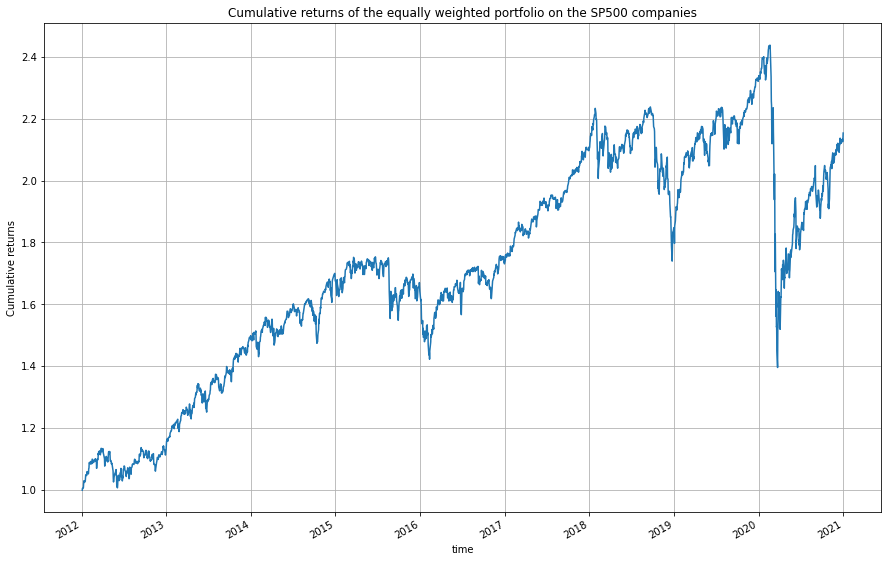

In [3]:
portfolio().plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the equally weighted portfolio on the SP500 companies", figsize=(15, 10)) 

# Market weights

In [5]:
from portfolios.market_weights import MarketWeighted



portfolio = MarketWeighted(configuration)


TypeError: __init__() got an unexpected keyword argument 'username'

In [47]:
import pandas as pd
from functools import reduce


f = list(map(lambda x: x[1].drop(columns=["ticker"]).set_index("date").rename(columns={"shrout":x[0]}), filter(lambda x: len(x[1]) == 2265, sharesout.sharesout.merge(sharesout.permcos, on="permco").drop(columns=["permco"]).groupby(["ticker"]).__iter__())))
tmp = reduce(lambda x, y: x.merge(y, left_index=True, right_index=True), f)
tmp

date
2012-01-03    1.0
2012-01-04    1.0
2012-01-05    1.0
2012-01-06    1.0
2012-01-09    1.0
             ... 
2020-12-24    1.0
2020-12-28    1.0
2020-12-29    1.0
2020-12-30    1.0
2020-12-31    1.0
Length: 2265, dtype: float64

In [49]:
portfolio.data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.816809,4.826836,66.431755,12.591937,NaN,32.449608,18.250000,22.094467,43.607437,28.570000,...,19.624762,26.523657,57.094898,33.148170,21.926786,34.782356,49.557644,35.720001,14.441823,NaN
2012-01-04,23.627478,4.741989,67.989182,12.659609,NaN,32.560413,18.110001,22.008778,43.590965,28.280001,...,19.495552,26.245661,57.108147,33.138813,22.650696,35.019897,48.886982,35.450001,14.760459,NaN
2012-01-05,24.156307,5.156796,68.421791,12.800154,NaN,32.807621,18.270000,21.958136,42.759171,28.480000,...,19.581684,26.474596,56.935558,33.166908,22.327993,35.287128,49.465771,35.400002,15.173823,NaN
2012-01-06,24.417461,5.279352,68.739052,12.933966,NaN,32.892841,18.139999,21.759474,42.685047,28.719999,...,19.524265,26.302893,56.510658,32.970142,21.952940,35.542503,49.594410,35.110001,15.191041,NaN
2012-01-09,25.057272,5.392481,68.719810,12.913450,NaN,32.875797,18.209999,21.755568,42.610939,28.530001,...,19.538620,26.875231,56.762951,32.810871,22.040167,35.405914,49.961906,34.950001,15.397725,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,158.531204,18.170000,236.500000,180.330002,133.029587,131.899994,357.829987,140.962799,414.255981,577.679993,...,66.820000,222.779999,61.889999,55.841362,118.290001,138.009995,127.809998,606.330017,63.009998,246.509995
2021-12-28,158.970612,18.540001,238.130005,179.289993,133.009781,132.360001,357.440002,139.976273,414.196136,569.359985,...,67.620003,220.270004,61.689999,55.921204,119.519997,137.979996,128.210007,597.320007,63.110001,244.250000
2021-12-29,160.438675,18.049999,241.029999,179.380005,133.969818,133.339996,361.839996,140.693741,414.345795,569.289978,...,67.959999,217.619995,61.150002,56.540001,119.360001,138.660004,128.229996,601.119995,63.450001,247.029999
